In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp               # pour le traitement du signal (tout n'est pas dans numpy)
from scipy import signal
from scipy import fftpack 

In [23]:
Data=pd.read_csv('rec00001.asc',skiprows=2,names=['S'])
Data

S
0    -1.651962e-06
1    -3.374834e-06
2    -1.946111e-06
3    -1.189727e-06
4    -2.618451e-06
...            ...
4091  4.491024e-07
4092  2.810173e-07
4093 -1.273770e-06
4094 -1.147706e-06
4095 -8.535572e-07

[4096 rows x 1 columns]

In [24]:
dt=0.25*10**(-3)
Data['time']=np.arange(0,len(Data)*dt,dt)

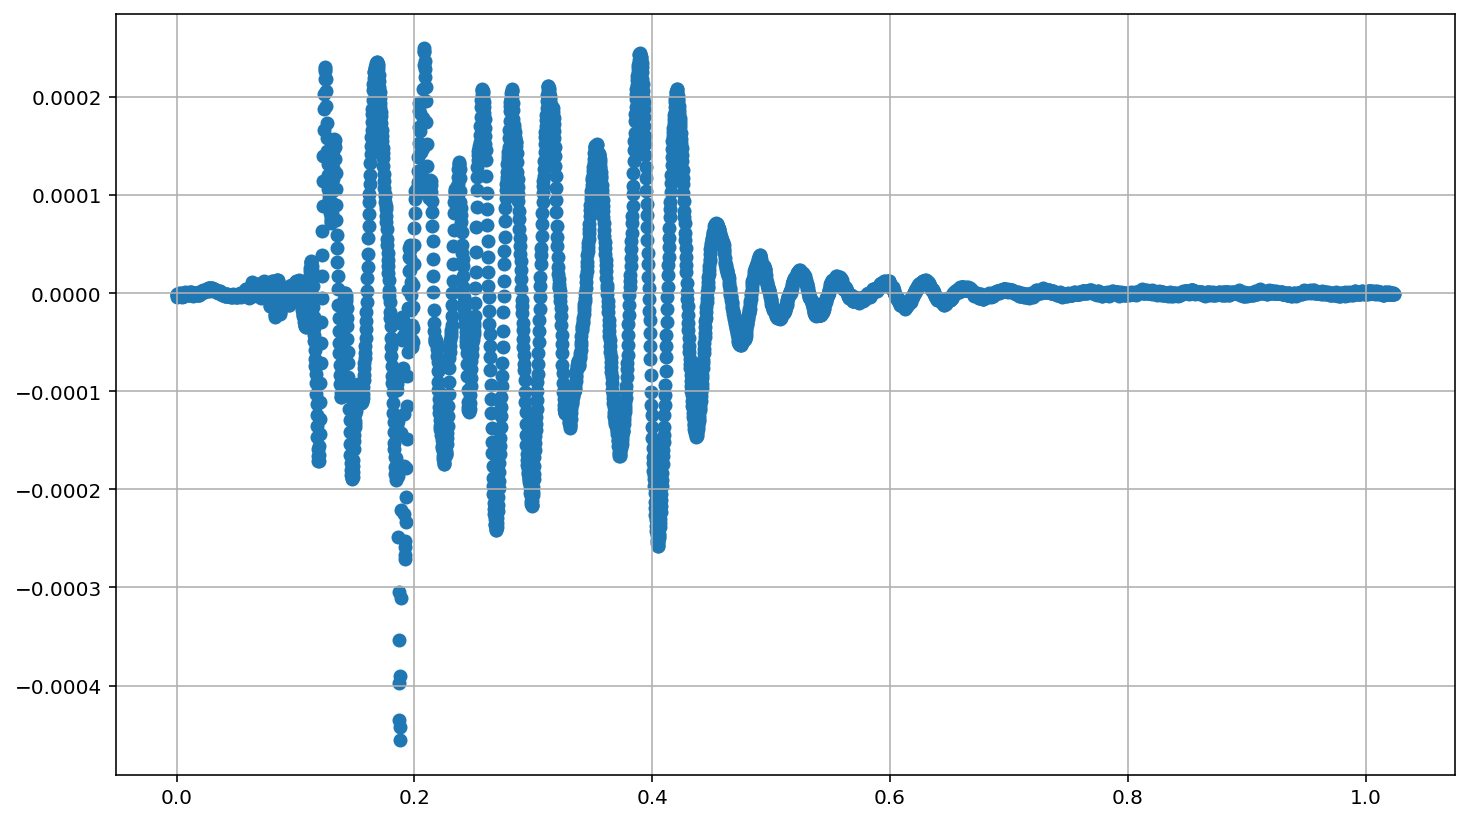

In [26]:
figi,ax=plt.subplots(1,1)
ax.scatter(Data.time,Data.S)
ax.grid()

/tmp/ipykernel_657/706508731.py:5: RuntimeWarning: divide by zero encountered in true_divide
  timi=1/frequency


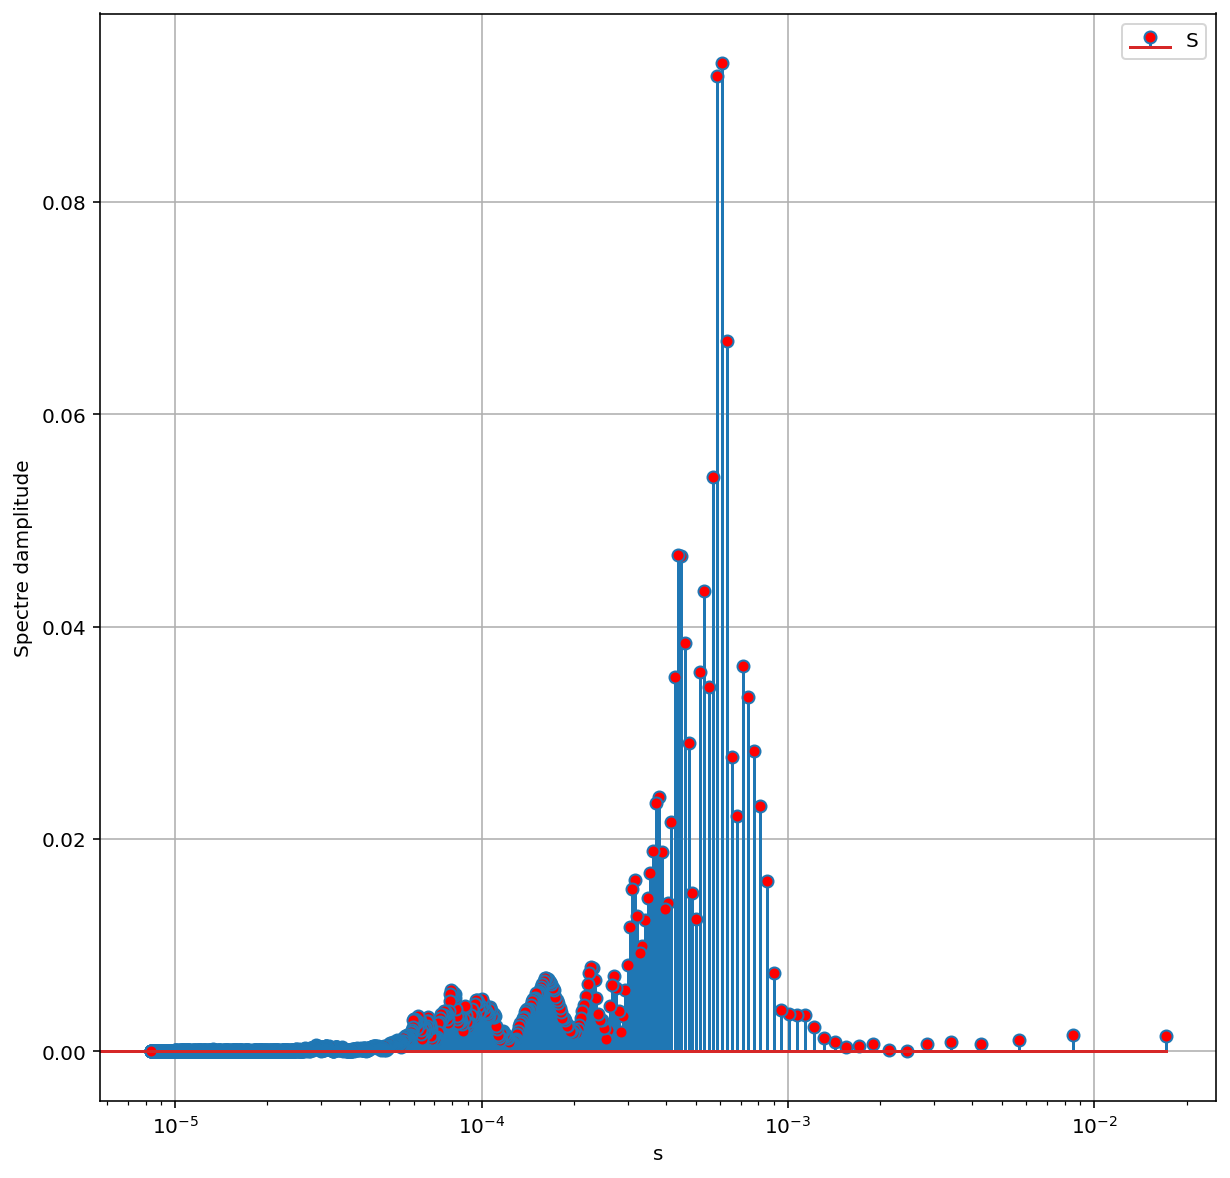

In [30]:
fe=1/dt
YY = fftpack.fft(Data['S'].values)
frequency = fftpack.fftfreq(len(Data.S)) * fe
timi=1/frequency
timi[0]=0
figure, axis = plt.subplots(1,1,figsize=(10,10))

markerline, stemlines, baseline = axis.stem(timi/60, np.abs(YY),label='S')
markerline.set_markerfacecolor('r')
axis.legend()
axis.grid()
axis.set_xlabel('s')
axis.set_ylabel('Spectre d''amplitude')
axis.set_xscale("log", base=10)   # échelle log pour l'axe des fréquences
#axis.set_xlim(1/(60*fe),100000)



/tmp/ipykernel_657/4005303256.py:3: RuntimeWarning: divide by zero encountered in true_divide
  periodeTP=1/fre


(0.0, 1000.0)

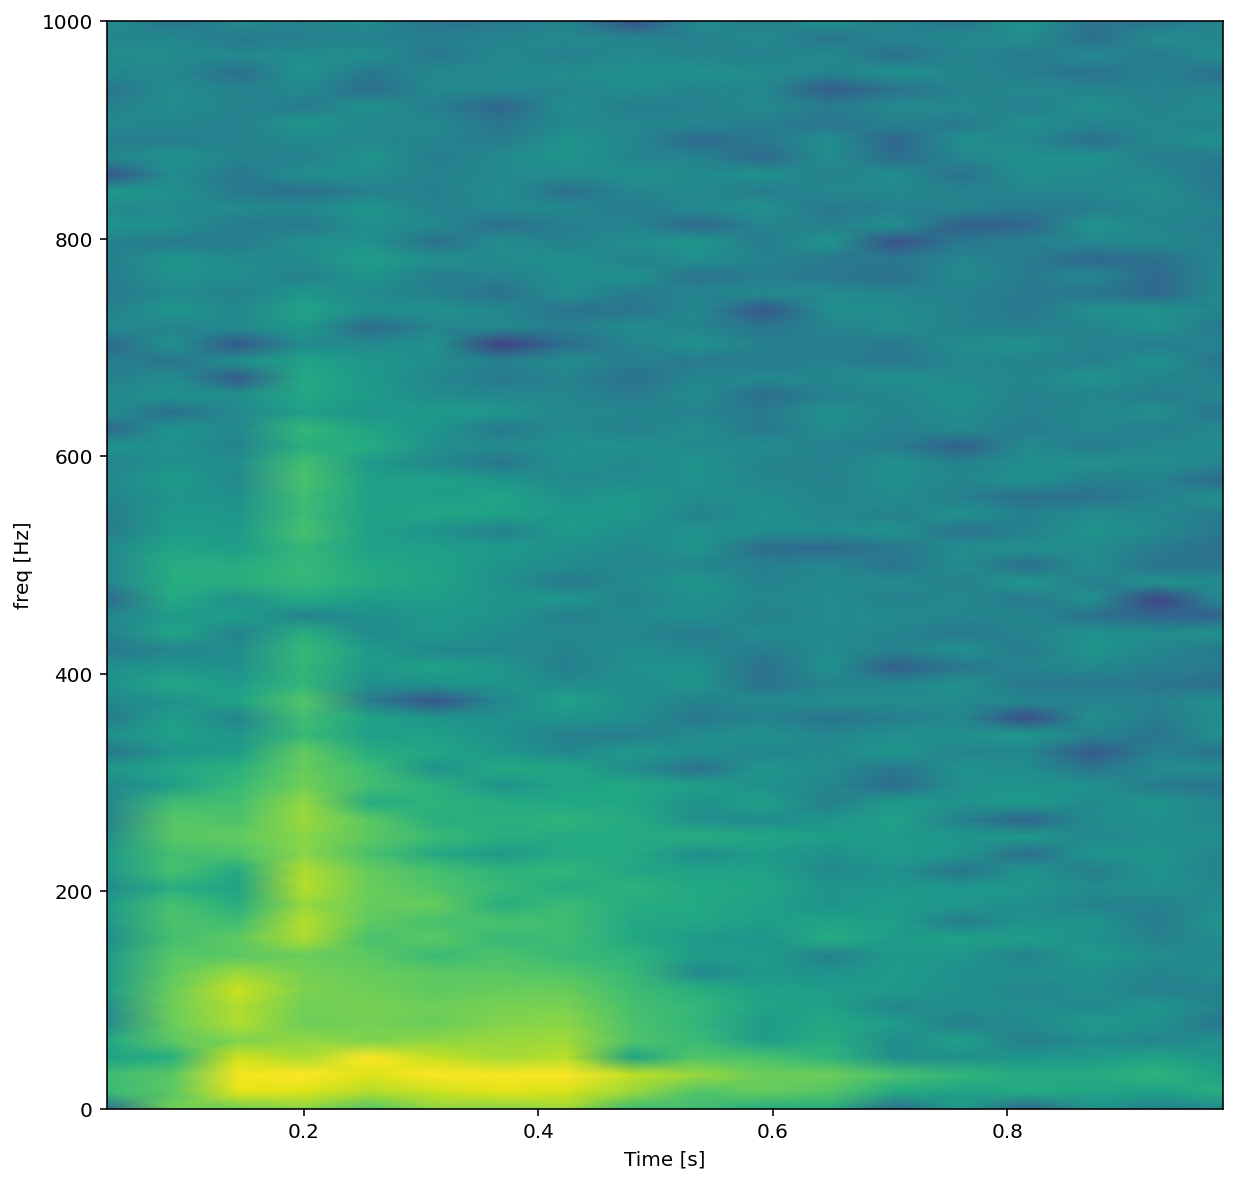

In [37]:

figure, ax = plt.subplots(1,1,figsize=(10,10))
fre, tim, Sxx = signal.spectrogram(Data.S.values, fe)
periodeTP=1/fre
periodeTP[0]=periodeTP[1]*10  #pour remplacer la valeur inf correspondant à la frequence nulle
ax.pcolormesh(tim, fre, np.log(Sxx), shading='gouraud')
ax.set_ylabel('freq [Hz]')
ax.set_xlabel('Time [s]')
ax.set_ylim(0, 1000)  
# ax[jj,kk].set_ylim(0, 60)  # affichage sur 0-60 jours (>2mois) => on voit des raies sur l'intervalle 15-30 jours
